In [1]:
import sys
sys.path.append("/home/gula/Desktop/Work_capella/Python/Python_Modules_p3/") 

from Modules import *
from Modules_gula import *

########

simul = load(simul = 'gigatl3_1h [2100-200,2100+200,1800-200,1800+200,[1,200,1]] 2540');
simul_horiz = load(simul = 'gigatl3_1h_horiz [1100-200,1100+200,1800-200,1800+200,[1,200,1]] 2540');


depths=[-1500,-1000,-500];
idepth=0; depth = depths[idepth]
domain = 'zoom'



no basemap module installed
simulname is None
args (['gigatl3_1h', '[2100-200,2100+200,1800-200,1800+200,[1,200,1]]', '2540'],)
args[0] ['gigatl3_1h', '[2100-200,2100+200,1800-200,1800+200,[1,200,1]]', '2540']
len(args[0]) 3
coord
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/omega/local/tmp/1/gula/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [2100-200,2100+200,1800-200,1800+200,[1,200,1]] [2100
coordmax
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/omega/local/tmp/1/gula/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
cst
read Cs_r in grdfile.variables
no Zob in job ... using Zob = 0.01
dt
dt is read in  /net/omega/local/tmp/1/gula/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
[1900, 2300, 1600, 2000, array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  

In [2]:
# Variables from file

try:
    
    vrt = np.load('./data_files_py/'  + simul.simul +  format(-depth) +  domain + '_' + 'vrt' + '.npy')[0,:,:]
    #bvf = np.load('./data_files_py/'  + simul.simul +  format(-depth) +  domain + '_' + 'bvf' + '.npy')[0,:,:]
    #Ri = np.load('./data_files_py/'  + simul.simul +  format(-depth) +  domain + '_' + 'Ri' + '.npy')[0,:,:]
    ow = np.load('./data_files_py/'  + simul.simul +  format(-depth) +  domain + '_' + 'ow' + '.npy')[0,:,:]
    #pv = np.load('./data_files_py/'  + simul.simul +  format(-depth) +  domain + '_' + 'pv' + '.npy')[0,:,:]

    print('loaded .npy files')
    
except:

    ######
    vrt = var('vrt',simul,depths=[depth],method='old').data / tools.rho2psi(simul.f)
    np.save('./data_files_py/' + simul.simul +  format(-depth) +  domain + '_' + 'vrt' + '.npy',[vrt])
    
    
    #bvf  = var('bvf',simul,depths=[depth]).data
    #np.save('./data_files_py/' + simul.simul +  format(-depth) +  domain + '_' + 'bvf' + '.npy',[bvf])
    
    ######

    #dzu = var('dzu',simul,depths=[depth]).data
    #dzv  = var('dzv',simul,depths=[depth]).data
    #Ri = bvf/((tools.u2rho(dzu)**2 + tools.v2rho(dzv)**2)); del dzu,dzv

    #np.save('./data_files_py/' + simul.simul +  format(-depth) +  domain + '_' + 'Ri' + '.npy',[Ri])

    ######      

    ow = var('ow',simul,depths=[depth]).data   
    np.save('./data_files_py/' + simul.simul +  format(-depth) +  domain + '_' + 'ow' + '.npy',[ow])
    
    ######      

    #pv = var('pv',simul,depths=[depth],method='old').data
    #np.save('./data_files_py/' + simul.simul +  format(-depth) +  domain + '_' + 'pv' + '.npy',[pv])
    


loaded .npy files


In [3]:
# Variables from horizontal file (computed using horizontal_section.py)

vrt_horiz = var('vrt',simul_horiz,depths=[idepth+1]).data / tools.rho2psi(simul.f)

ow_horiz = var('ow',simul_horiz,depths=[idepth+1]).data 


In [4]:
# For plotting

coord = 'deg'

if coord=='deg':
    #using lon,lat
    lon = simul.x; lat = simul.y
    xlabel = 'lon'; ylabel = 'lat'
elif coord=='km':
    # using km
    [lon,lat] = np.meshgrid(np.arange(simul.x.shape[0])+simul.coord[2],np.arange(simul.x.shape[1])+simul.coord[0])
    lon = (lon/np.mean(simul.pm)*1e-3).T
    lat = (lat/np.mean(simul.pn)*1e-3).T
    xlabel = 'km'; ylabel = 'km'
elif coord=='points':
    # using grid points
    [lon,lat] = np.meshgrid(np.arange(simul.x.shape[0])+simul.coord[2],np.arange(simul.x.shape[1])+simul.coord[0])
    lon,lat = lon.T,lat.T
    xlabel = 'grid pts'; ylabel = 'grid pts'



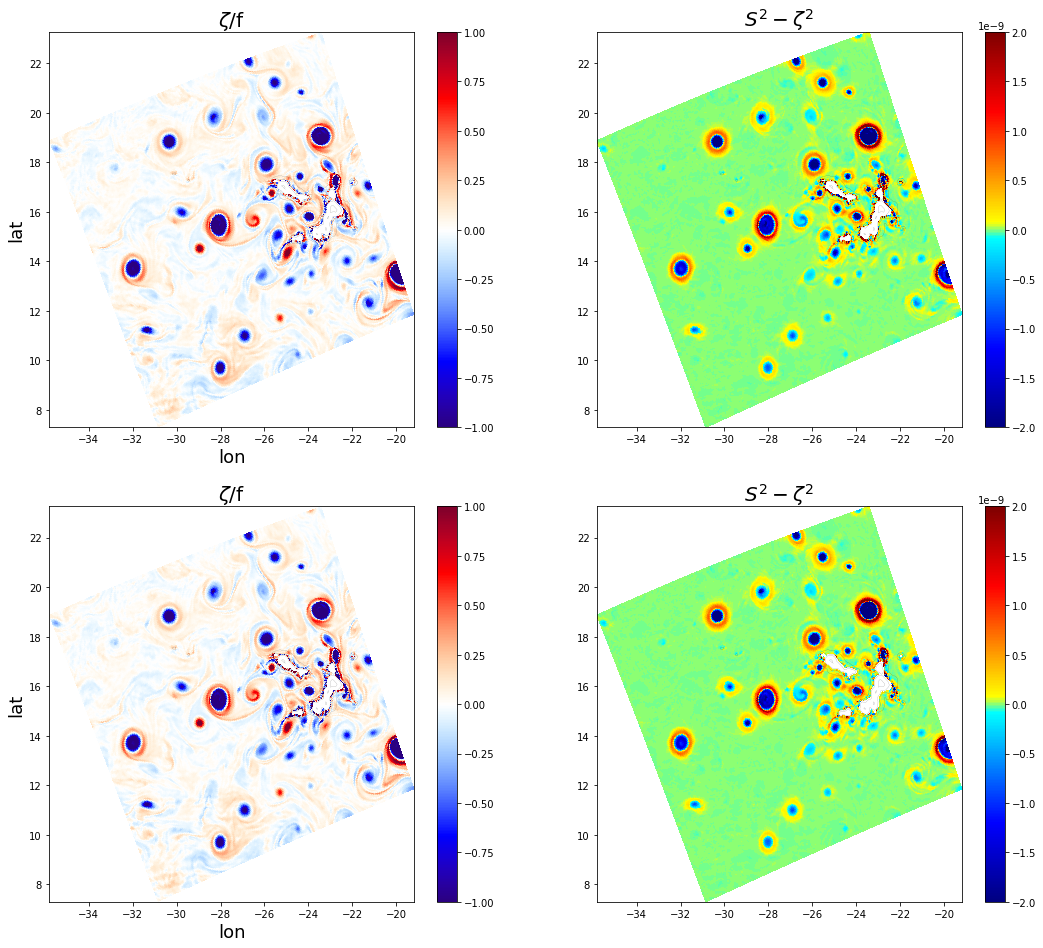

In [5]:
import matplotlib.colors as colors

#################################################
# Plot  data
#################################################

fig = plt.figure(figsize=(18.0,16.0)) 

###

ax1 = plt.subplot(2,2,1);

plt.pcolormesh(tools.rho2psi(lon),tools.rho2psi(lat),ma.masked_invalid(vrt),\
               cmap = plot.ncview_colormap('blu_red'),vmin=-1.,vmax=1.);
plt.colorbar()
CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 

plt.xlabel(xlabel,fontsize=18); plt.ylabel(ylabel,fontsize=18)
plt.title(r'$\zeta$/f', fontsize=20)

###

ax1 = plt.subplot(2,2,2);
plt.pcolormesh(lon,lat,ma.masked_invalid(ow),\
               cmap = plot.colormap('ageo'),vmin=-0.2e-8,vmax=0.2e-8);
plt.colorbar()
CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 

plt.title(r'$ S^2 - \zeta^2 $', fontsize=20)

###

ax1 = plt.subplot(2,2,3);

plt.pcolormesh(tools.rho2psi(lon),tools.rho2psi(lat),ma.masked_invalid(vrt_horiz),\
               cmap = plot.ncview_colormap('blu_red'),vmin=-1.,vmax=1.);
plt.colorbar()
CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 

plt.xlabel(xlabel,fontsize=18); plt.ylabel(ylabel,fontsize=18)
plt.title(r'$\zeta$/f', fontsize=20)

###

ax1 = plt.subplot(2,2,4);
plt.pcolormesh(lon,lat,ma.masked_invalid(ow_horiz),\
               cmap = plot.colormap('ageo'),vmin=-0.2e-8,vmax=0.2e-8);
plt.colorbar()
CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 

plt.title(r'$ S^2 - \zeta^2 $', fontsize=20)

###


plt.savefig(simul.simul + '_test_' + format(-depth) +  domain + '.png', size=None, figure=None, bbox_inches='tight',\
            magnification='auto',transparent='true', dpi=300)


/home/gula/.virtualenvs/croco/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in less
/home/gula/.virtualenvs/croco/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater
/home/gula/.virtualenvs/croco/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in greater
/home/gula/.virtualenvs/croco/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater


-1.7685119109655706e-10


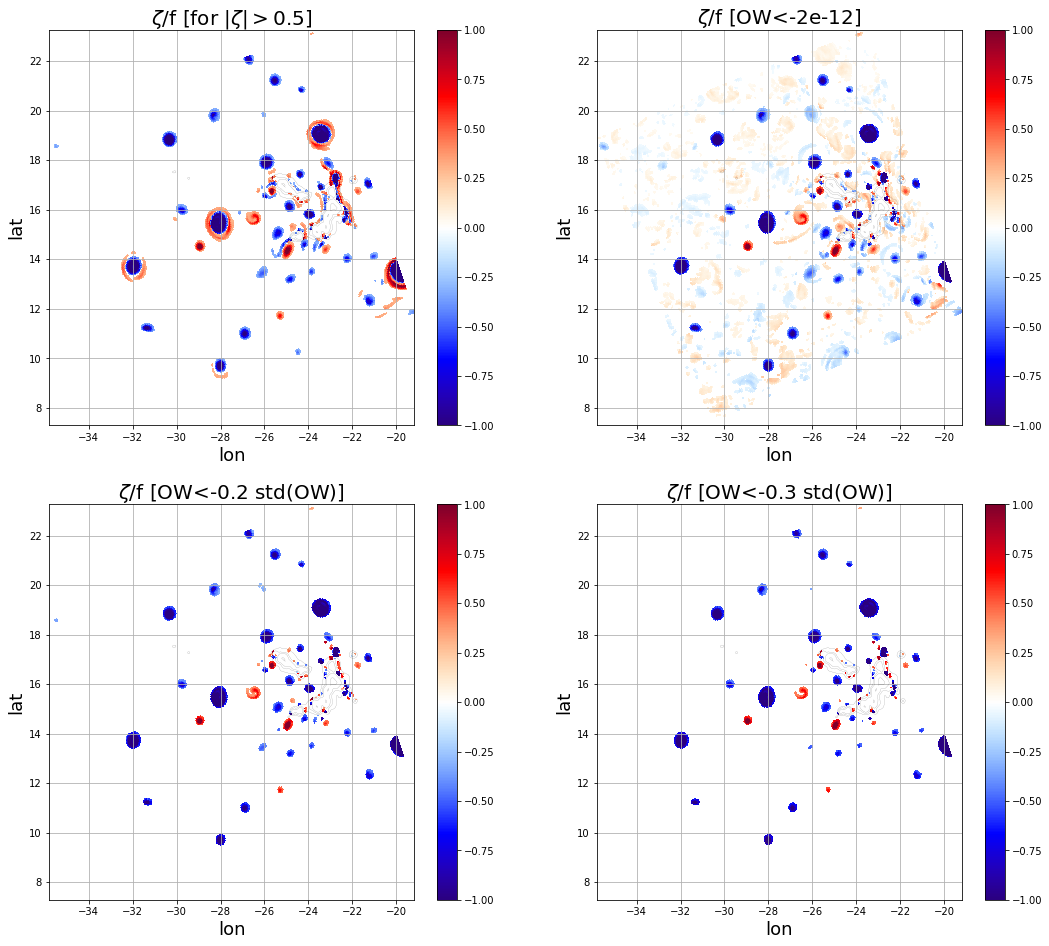

In [6]:
# copy vorticity and Ri
vrtm = tools.psi2rho(vrt)*simul.mask
owm = ow*simul.mask

# remove equator
vrtm[np.abs(simul.y)<5] = np.nan

# remove values close to topography
#vrtm[(simul.topo<-depth +500)] = np.nan
#Rim[(simul.topo<-depth +500)] = np.nan


#######
# threshold
vrtlim=0.3

# mask values larger than threshold
vrtm_a = copy(vrtm); 
vrtm_1 = copy(vrtm); 
vrtm_2 = copy(vrtm); 
vrtm_3 = copy(vrtm); 

# Keep only large vorticity values (> 0.5 f)
vrtm_a[np.abs(vrtm)<vrtlim] = np.nan

# Keep only negative OW values
vrtm_1[owm>-2e-12] = np.nan

# Keep only negative OW values
vrtm_2[owm>np.nanstd(owm)*-0.2] = np.nan

# Keep only negative OW values
vrtm_3[owm>np.nanstd(owm)*-0.3] = np.nan

print(np.nanstd(owm)*-0.2)

#################################################
# Plot  data
#################################################

fig = plt.figure(figsize=(18.0,16.0)) 
ax1 = plt.subplot(2,2,1);

plt.pcolormesh(lon,lat,ma.masked_invalid(vrtm_a),\
               cmap = plot.ncview_colormap('blu_red'),vmin=-1.,vmax=1.);
plt.colorbar()
CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 

plt.grid()   
plt.xlabel(r'lon',fontsize=18); plt.ylabel(r'lat',fontsize=18)
plt.title(r'$\zeta$/f [for $|\zeta|>0.5$]', fontsize=20)


###

ax1 = plt.subplot(2,2,2);

plt.pcolormesh(lon,lat,ma.masked_invalid(vrtm_1),\
               cmap = plot.ncview_colormap('blu_red'),vmin=-1.,vmax=1.);
plt.colorbar()
CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 

plt.grid()   
plt.xlabel(xlabel,fontsize=18); plt.ylabel(ylabel,fontsize=18)
plt.title(r'$\zeta$/f [OW<-2e-12]', fontsize=20)


###

ax1 = plt.subplot(2,2,3);

plt.pcolormesh(lon,lat,ma.masked_invalid(vrtm_2),\
               cmap = plot.ncview_colormap('blu_red'),vmin=-1.,vmax=1.);
plt.colorbar()
CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 

plt.grid()   
plt.xlabel(r'lon',fontsize=18); plt.ylabel(r'lat',fontsize=18)
plt.title(r'$\zeta$/f [OW<-0.2 std(OW)]', fontsize=20)


###

ax1 = plt.subplot(2,2,4);

plt.pcolormesh(lon,lat,ma.masked_invalid(vrtm_3),\
               cmap = plot.ncview_colormap('blu_red'),vmin=-1.,vmax=1.);
plt.colorbar()
CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 

plt.grid()   
plt.xlabel(xlabel,fontsize=18); plt.ylabel(ylabel,fontsize=18)
plt.title(r'$\zeta$/f [OW<-0.3 std(OW)]', fontsize=20)

###

plt.savefig(simul.simul + '_map_vrt_ac_' + format(-depth) +  domain + '.png', size=None, figure=None, bbox_inches='tight',\
            magnification='auto',transparent='true', dpi=300)


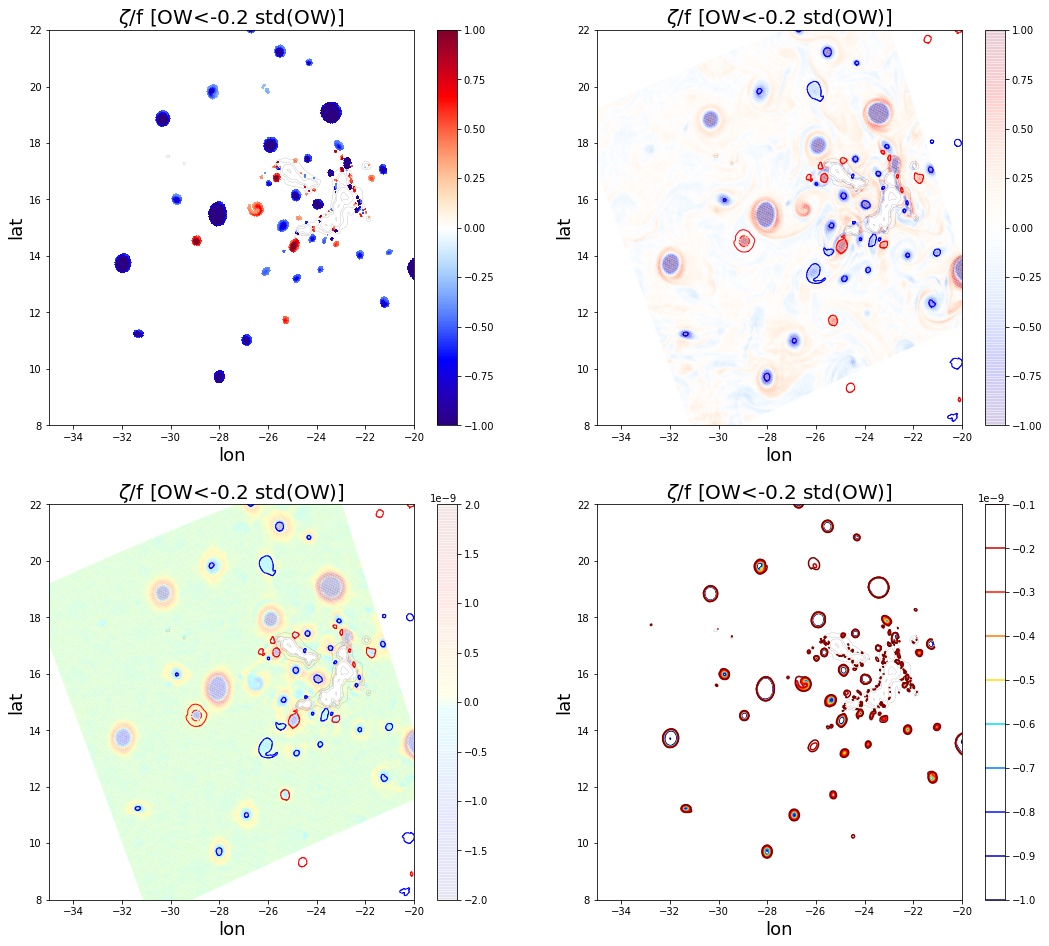

In [23]:
# results from py-eddy-tracker


file_ac = Dataset('Anticyclonic_20190223.nc','r')
file_c = Dataset('Cyclonic_20190223.nc','r')
#ax.pcolormesh(self.x_bounds, self.y_bounds, self.grid(name).T, **kwargs)


lat_c = file_c.variables['latitude_max'][:]
lon_c = file_c.variables['longitude_max'][:] - 360.

late_c = file_c.variables['effective_contour_latitude'][:]
lone_c = file_c.variables['effective_contour_longitude'][:] - 360.

lats_c = file_c.variables['speed_contour_latitude'][:]
lons_c = file_c.variables['speed_contour_longitude'][:] - 360.

lat_ac = file_ac.variables['latitude_max'][:]
lon_ac = file_ac.variables['longitude_max'][:] - 360.


late_ac = file_ac.variables['effective_contour_latitude'][:]
lone_ac = file_ac.variables['effective_contour_longitude'][:] - 360.

lats_ac = file_ac.variables['speed_contour_latitude'][:]
lons_ac = file_ac.variables['speed_contour_longitude'][:] - 360.

file_ac.close()
file_c.close()


###############################################
# Plot  data
#################################################

fig = plt.figure(figsize=(18.0,16.0)) 

ax1 = plt.subplot(2,2,1);

plt.pcolormesh(lon,lat,ma.masked_invalid(vrtm_2),\
               cmap = plot.ncview_colormap('blu_red'),vmin=-1.,vmax=1.);
plt.colorbar()
CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 

plt.grid()   
plt.xlabel(r'lon',fontsize=18); plt.ylabel(r'lat',fontsize=18)
plt.title(r'$\zeta$/f [OW<-0.2 std(OW)]', fontsize=20)

plt.axis([-35,-20,8,22])
plt.grid()

########



ax1 = plt.subplot(2,2,2);

plt.pcolormesh(lon,lat,ma.masked_invalid(vrt),\
               cmap = plot.ncview_colormap('blu_red'),vmin=-1.,vmax=1.,alpha=0.1); plt.colorbar()
CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 

plt.grid()   
plt.xlabel(r'lon',fontsize=18); plt.ylabel(r'lat',fontsize=18)
plt.title(r'$\zeta$/f [OW<-0.2 std(OW)]', fontsize=20)


#plt.plot(lon_c,lat_c,'oy')
#plt.plot(lon_ac,lat_ac,'ok')

for i in range(lone_ac.shape[0]):
    #plt.contour(lone_c,late_c)
    plt.plot(lone_ac[i,:],late_ac[i,:], color='b', linewidth=1.)
    plt.plot(lons_ac[i,:],lats_ac[i,:], linestyle="-.", color='b', linewidth=1.)
    
for i in range(lone_c.shape[0]):
    plt.plot(lone_c[i,:],late_c[i,:], color='r', linewidth=1.)
    plt.plot(lons_c[i,:],lats_c[i,:], linestyle="-.", color='r', linewidth=1.)
    
plt.axis([-35,-20,8,22])
plt.grid()

###########

ax1 = plt.subplot(2,2,3);

plt.pcolormesh(lon,lat,ma.masked_invalid(ow),\
               cmap = plot.colormap('ageo'),vmin=-2e-9,vmax=2.e-9,alpha=0.05); plt.colorbar()

CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 

plt.grid()   
plt.xlabel(r'lon',fontsize=18); plt.ylabel(r'lat',fontsize=18)
plt.title(r'$\zeta$/f [OW<-0.2 std(OW)]', fontsize=20)


#plt.plot(lon_c,lat_c,'oy')
#plt.plot(lon_ac,lat_ac,'ok')

for i in range(lone_ac.shape[0]):
    #plt.contour(lone_c,late_c)
    plt.plot(lone_ac[i,:],late_ac[i,:], color='b', linewidth=1.)
    plt.plot(lons_ac[i,:],lats_ac[i,:], linestyle="-.", color='b', linewidth=1.)
    
for i in range(lone_c.shape[0]):
    plt.plot(lone_c[i,:],late_c[i,:], color='r', linewidth=1.)
    plt.plot(lons_c[i,:],lats_c[i,:], linestyle="-.", color='r', linewidth=1.)
    
plt.axis([-35,-20,8,22])
plt.grid()


#########

ax1 = plt.subplot(2,2,4);

plt.contour(lon,lat,ma.masked_invalid(ow),\
               np.arange(-1e-9,0,1e-10),cmap = plot.colormap('ageo')); plt.colorbar()

CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 

plt.grid()   
plt.xlabel(r'lon',fontsize=18); plt.ylabel(r'lat',fontsize=18)
plt.title(r'$\zeta$/f [OW<-0.2 std(OW)]', fontsize=20)

    
plt.axis([-35,-20,8,22])
plt.grid()

In [15]:
np.nanmin(ow)

-2.062157485458784e-08

In [40]:
# Computing LNAM

# u and v  

u = var('u',simul,depths=[depth]).data
v = var('v',simul,depths=[depth]).data

uu = tools.u2rho(u)
vv = tools.v2rho(v)

####### grid 

b=10

####

[x,y] = np.meshgrid(np.arange(simul.x.shape[0]),np.arange(simul.x.shape[1]))
x,y = x.T,y.T

L = x*0.

for i in np.arange(b,simul.x.shape[0]-b):
    for ii in np.arange(b,simul.y.shape[0]-b):

        x_ = x[i - b: i + b +1,ii - b: ii + b +1]      
        y_ = y[i - b: i + b +1,ii - b: ii + b +1]          
        u_ = uu[i - b: i + b +1,ii - b: ii + b +1]           
        v_ = vv[i - b: i + b +1,ii - b: ii + b +1]         

        ######

        dx = x_ - x_[b,b]
        dy = y_ - y_[b,b]

        cross = (dx * v_) - (dy * u_)
        dot = (u_ * dx) + (v_ * dy)

        product = np.sqrt(u_ ** 2 + v_** 2) * np.sqrt(dx ** 2 + dy **2)
 
        sumdp = np.sum(dot) + np.sum(product)
       
        L[i, ii] = np.sum(cross) / sumdp 

        
L[ow>-1e-10] = np.nan

/home/gula/.virtualenvs/croco/lib/python3.5/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater


Text(0.5, 1.0, '$LNAM$')

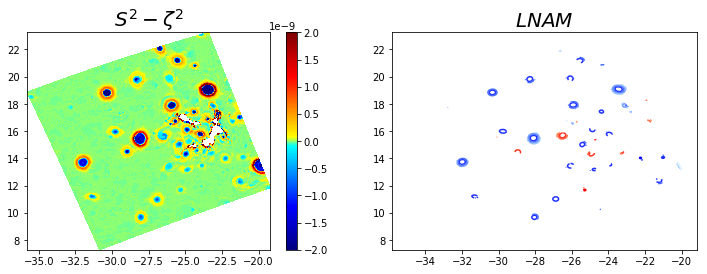

In [47]:

fig = plt.figure(figsize=(12.0,4.0)) 
ax1 = plt.subplot(1,2,1);

plt.pcolormesh(lon,lat,ma.masked_invalid(ow),\
               cmap = plot.colormap('ageo'),vmin=-0.2e-8,vmax=0.2e-8);
plt.colorbar()

plt.title(r'$ S^2 - \zeta^2 $', fontsize=20)


###

ax1 = plt.subplot(1,2,2);
#plt.pcolormesh(lon,lat,L,cmap = plot.colormap('ageo'),vmin=-1.5,vmax=1.5); plt.colorbar()
plt.contour(lon,lat,L,np.linspace(-1.5,1.5,20),cmap = plot.colormap('blu_red')); #plt.colorbar()

plt.title(r'$LNAM$', fontsize=20)


In [37]:


ow.shape

(400, 400)